In [1]:
using Pkg
Pkg.activate(".")
using Filtration
using OptimalControl
using Plots
using MadNLP
using ForwardDiff

  Activating project at `c:\Users\Remy_Dutto\Documents\GitHub\Filtration.jl\ressources`


In [2]:
function Base.show(io::IO, b::BigFloat)
    print(io, Base.MPFR._string(b, 4))
end

In [3]:
# Benyahia & al. model
a = 1; b = 1; e = 1;
f₁ = m ->  b ./ (e .+ m)
f₂ = m -> a .* m
g  = m -> 1 ./ (e .+ m)
model = membrane_filtration_model(f₁, f₂, g);

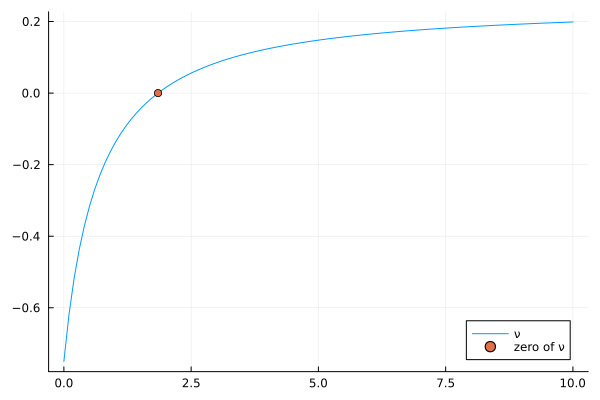

In [4]:
ν = get_η(model)
root = get_root(model)
plot(range(0,10, 100), ν, label = "ν")
scatter!([root], [ν(root)], label = "zero of ν")

The options set during resolve may not have an effect
This is MadNLP version v0.8.5, running with umfpack

Number of nonzeros in constraint Jacobian............:     2502
Number of nonzeros in Lagrangian Hessian.............:      502

Total number of variables............................:      753
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      251
                     variables with only upper bounds:        0
Total number of equality constraints.................:      502
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 9.00e-01 3.42e-02  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1 -5.0890620e-01 7.30e

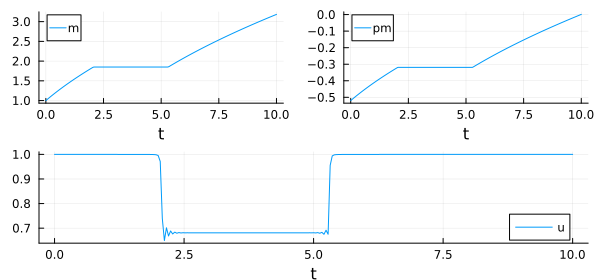

In [5]:
t0 = 0; m0 = 1; tf = 10;                 # initial and final time and state
@def ocp begin                          # problem definition

    t ∈ [ t0, tf ], time
    m ∈ R, state
    u ∈ R, control

    -1 ≤ u(t) ≤ 1
    m(t0) == m0
    ṁ(t) == model.state_dynamic(m(t),u(t))
    ∫( model.cost_dynamic(m(t),u(t))) → max

end

N = 100
sol = OptimalControl.solve(ocp, :madnlp; display = true, tol = 1e-6)
plot(sol)